0. Import bibliotek

In [59]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

1. Wyświetlanie listy id produktów o których zostały pobrane opinie

In [60]:
print([file.split(".")[0] for file in os.listdir("opinions")], sep ="\n")

['131097916', '165423702', '78035068']


2. Wczytanie kodu produktu o którym mają zostać przeanalizowane opinie

In [61]:
product_id = input("Podaj kod produktu: ")
opinions = pd.read_json(f'opinions/{product_id}.json')
opinions.stars = opinions.stars.apply(lambda s: s.split("/")[0].replace(",", ".")).astype(float)
opinions

,opinion_id,author,recommend,stars,content,cons,pros,opinion_date,purchased_date,upvote,downvote
0,18658443,d...m,Polecam,5.0,Zmiana z iPhone 13 na Samsung a55 - nie żałuję...,[],"[czas pracy na baterii, funkcjonalność, łatwoś...",2024-05-19 11:28:44,2024-05-04 12:47:41,3,2
1,18715862,g...o,Polecam,5.0,Mam go kilka dni i póki co wszysko jest ok. Za...,[],[],2024-06-07 08:51:31,2024-05-28 19:51:35,0,0
2,18621082,p...i,Polecam,5.0,Użytkuję telefon kilka tygodni. Spełnia wszyst...,[],[],2024-05-03 08:46:25,2024-04-10 22:58:19,6,0
3,18662695,p...i,Polecam,5.0,"Bardzo solidne wykonanie, świetny wyświetlacz,...",[],"[czas pracy na baterii, funkcjonalność, łatwoś...",2024-05-21 08:22:28,2024-05-02 08:36:25,0,1
4,18654396,w...z,Polecam,5.0,"jakość świetna, menu jak z każdym nowym telefo...",[],[],2024-05-16 19:37:44,2024-05-08 16:24:58,0,0
...,...,...,...,...,...,...,...,...,...,...,...
139,18679596,e...8,Polecam,5.0,ok,[],[],2024-05-27 20:23:07,2024-05-12 18:44:10,0,0
140,18667805,h...s,Polecam,4.0,OK,[],"[czas pracy na baterii, funkcjonalność, łatwoś...",2024-05-22 12:27:51,2024-05-11 12:58:00,0,0
141,18667592,s...3,Polecam,5.0,Ok,[],"[czas pracy na baterii, funkcjonalność, łatwoś...",2024-05-22 11:45:31,2024-05-20 19:54:06,0,0
142,18644120,d...k,Polecam,5.0,Ok,[],[],2024-05-13 18:37:57,2024-05-05 20:09:41,0,0


3. Podstawowe statystyki

In [62]:
opinion_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
avarage_stars = opinions.stars.mean()
avarage_stars

4.840277777777778

4. Histogram częstości ocen w opiniach

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '115')]

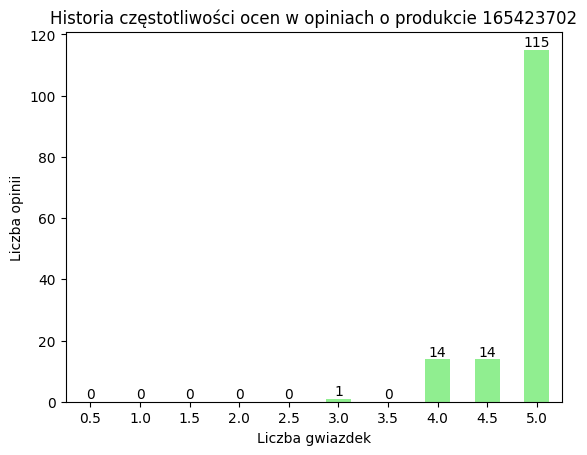

In [63]:
stars_distribution = opinions.stars.value_counts().reindex(np.arange(0.5,5.5,0.5))
ax = stars_distribution.plot.bar(color = "lightgreen")
ax.set_title(f"Historia częstotliwości ocen w opiniach o produkcie {product_id}")
ax.set_xlabel("Liczba gwiazdek")
ax.set_ylabel("Liczba opinii")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.bar_label(ax.containers[0], label_type="edge", fmt=lambda l: int(l) if 1 > 0 else '')

5. Wykres udziału rekomendacji w opiniach

Text(0.5, 1.0, 'Udział rekomendacji w opiniach o produkcie 165423702')

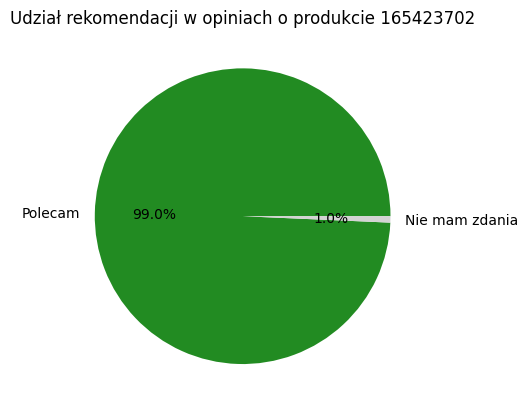

In [64]:
recomendations_distribution = opinions.recommend.value_counts(dropna=False).reindex(["Polecam", "Nie polecam", None])
recomendations_distribution.plot.pie(
    autopct = lambda p: f'{p:.1f}%' if p > 0 else '',
    label = "",
    colors = ['forestgreen', 'crimson', 'lightgrey'],
    labels = ['Polecam', 'Nie polecam', 'Nie mam zdania']
)
plt.title(f"Udział rekomendacji w opiniach o produkcie {product_id}")